<a href="https://colab.research.google.com/github/JakubKedzierski/tomato_detection/blob/main/Mask_RCNN_own_joined_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%shell
# clone Mask_RCNN repo and install packages
git clone https://github.com/matterport/Mask_RCNN
#2199 self.keras_model.add_metric(loss, name)

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 25.79 MiB/s, done.
Resolving deltas: 100% (562/562), done.


In [ ]:
%%shell
cd Mask_RCNN
python setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'ma

In [ ]:
!pip install keras==2.0.8
!pip install h5py==2.10.0
!pip install gluoncv
!pip install mxnet
!pip install imagecodecs
!pip install "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"
!pip install imgaug
%tensorflow_version 1.x

     |████████████████████████████████| 276 kB 5.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.0.8 which is incompatible.
     |████████████████████████████████| 2.9 MB 5.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which is incompatible.
tensorflow 2.6.0 requires keras~=2.6, but you have keras 2.0.8 which is

In [ ]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import json
import time
import imgaug.augmenters as iaa
from PIL import Image, ImageDraw

# Root directory of the project
ROOT_DIR = os.path.abspath("./Mask_RCNN/")
sys.path.append(ROOT_DIR) 
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
import mrcnn.utils as utils
skimage.io.use_plugin('gdal', 'imread')

sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # find local version
import coco
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
DATASET_DIR = os.path.join(ROOT_DIR, "tomatos")
if not os.path.exists(DATASET_DIR):
  os.mkdir(DATASET_DIR)
  
from google.colab import drive
drive.mount('/content/gdrive')
!tar -zxvf 'gdrive/My Drive/tomatos/RGB (1).tar.gz' -C ./Mask_RCNN/tomatos
!unzip /content/gdrive/MyDrive/tomato_own_dataset/tomato_own.zip -d ./Mask_RCNN/tomatos
DATASET_DIR = os.path.join(ROOT_DIR, "tomatos/images")
if not os.path.exists(DATASET_DIR):
  os.mkdir(DATASET_DIR)
!mv /content/Mask_RCNN/tomatos/color/*.png /content/Mask_RCNN/tomatos/images/
!mv /content/Mask_RCNN/tomatos/RGB/* /content/Mask_RCNN/tomatos/images/
!cp /content/gdrive/MyDrive/tomato_own_dataset/train_joined.json /content/Mask_RCNN/tomatos/
!cp /content/gdrive/MyDrive/tomato_own_dataset/test_joined.json /content/Mask_RCNN/tomatos/


Mounted at /content/gdrive
RGB/RealSense_T20190529_231417_R02_P042870_H2300_A+000_RGB.tiff
RGB/RealSense_T20190528_234421_R04_P022490_H1630_A+000_RGB.tiff
RGB/RealSense_T20190528_231500_R02_P044870_H0930_A+000_RGB.tiff
RGB/RealSense_T20190528_231135_R02_P035270_H1630_A+000_RGB.tiff
RGB/RealSense_T20190528_231351_R02_P041660_H1630_A+000_RGB.tiff
RGB/RealSense_T20190528_230754_R02_P024870_H1630_A+000_RGB.tiff
RGB/RealSense_T20190528_230249_R02_P010480_H3000_A+000_RGB.tiff
RGB/RealSense_T20190613_231946_R03_P002880_H2300_A+000_RGB.tiff
RGB/RealSense_T20190528_231152_R02_P036070_H0930_A+000_RGB.tiff
RGB/RealSense_T20190528_234546_R04_P026480_H3000_A+000_RGB.tiff
RGB/RealSense_T20190528_231351_R02_P041660_H0930_A+000_RGB.tiff
RGB/RealSense_T20190613_231954_R03_P003270_H2300_A+000_RGB.tiff
RGB/RealSense_T20190528_231938_R03_P005280_H2300_A+000_RGB.tiff
RGB/RealSense_T20190528_230009_R02_P002860_H1630_A+000_RGB.tiff
RGB/RealSense_T20190528_234231_R04_P017270_H2300_A+000_RGB.tiff
RGB/RealSense

In [ ]:
class GenericDataset(utils.Dataset):
    """ Generates a COCO-like dataset, i.e. an image dataset annotated in the style of the COCO dataset.
        See http://cocodataset.org/#home for more information.
    """
    def load_data(self, annotation_json, images_dir):
        """ Load the coco-like dataset from json
        Args:
            annotation_json: The path to the coco annotations json file
            images_dir: The directory holding the images referred to by the json file
        """
        # Load json from file
        json_file = open(annotation_json)
        coco_json = json.load(json_file)
        json_file.close()
        
        # Add the class names using the base method from utils.Dataset
        source_name = "coco_like"
        for category in coco_json['categories']:
            class_id = category['id']
            class_name = category['name']
            if class_id < 1:
                print('Error: Class id for "{}" cannot be less than one. (0 is reserved for the background)'.format(class_name))
                return
            
            self.add_class(source_name, class_id, class_name)
        
        # Get all annotations
        annotations = {}
        for annotation in coco_json['annotations']:
            image_id = annotation['image_id']
            if image_id not in annotations:
                annotations[image_id] = []
            annotations[image_id].append(annotation)
        
        # Get all images and add them to the dataset
        seen_images = {}
        for image in coco_json['images']:
            image_id = image['id']
            if image_id in seen_images:
                print("Warning: Skipping duplicate image id: {}".format(image))
            else:
                seen_images[image_id] = image
                try:
                    image_file_name = image['file_name']
                    image_width = image['width']
                    image_height = image['height']
                except KeyError as key:
                    print("Warning: Skipping image (id: {}) with missing key: {}".format(image_id, key))
                
                image_path = os.path.abspath(os.path.join(images_dir, image_file_name))
                
                try:
                  image_annotations = annotations[image_id]
                except KeyError:
                  image_annotations = None
                
                # Add the image using the base method from utils.Dataset
                self.add_image(
                    source=source_name,
                    image_id=image_id,
                    path=image_path,
                    width=image_width,
                    height=image_height,
                    annotations=image_annotations
                )
    def load_mask(self, image_id):
        """Load instance masks for the given image.
        Different datasets use different ways to store masks. This
        function converts the different mask format to one format
        in the form of a bitmap [height, width, instances].
        Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        # If not a COCO image, delegate to parent class.
        image_info = self.image_info[image_id]
        #if image_info["source"] != "coco_like":
        #    return super(GenericDataset, self).load_mask(image_id)   # ??

        instance_masks = []
        class_ids = []
        annotations = self.image_info[image_id]["annotations"]
        # Build mask of shape [height, width, instance_count] and list
        # of class IDs that correspond to each channel of the mask.
        if annotations is not None:
          for annotation in annotations:
              class_id = annotation['category_id']
              if class_id:
                  m = self.annToMask(annotation, image_info["height"],
                                    image_info["width"])
                  # Some objects are so small that they're less than 1 pixel area
                  # and end up rounded out. Skip those objects.
                  if m.max() < 1:
                      continue
                  # Is it a crowd? If so, use a negative class ID.
                  if annotation['iscrowd']:
                      # Use negative class ID for crowds
                      class_id *= -1
                      # For crowd masks, annToMask() sometimes returns a mask
                      # smaller than the given dimensions. If so, resize it.
                      if m.shape[0] != image_info["height"] or m.shape[1] != image_info["width"]:
                          m = np.ones([image_info["height"], image_info["width"]], dtype=bool)
                  instance_masks.append(m)
                  class_ids.append(class_id)

          # Pack instance masks into an array
        if class_ids:
            mask = np.stack(instance_masks, axis=2).astype(np.bool)
            class_ids = np.array(class_ids, dtype=np.int32)
            return mask, class_ids
        else:
            # Call super class to return an empty mask
            return super(GenericDataset, self).load_mask(image_id)
  

    def annToRLE(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE to RLE.
        :return: binary mask (numpy 2D array)
        """
        if not isinstance(ann['segmentation'][0], list): 
          segm = [ann['segmentation']]
        else:
          segm = ann['segmentation']
        segm = [list( map(int,i) ) for i in segm]
        
        if isinstance(segm, list):
            # polygon -- a single object might consist of multiple parts
            # we merge all parts into one mask rle code
            rles = maskUtils.frPyObjects(segm, height, width)
            rle = maskUtils.merge(rles)
        elif isinstance(segm['counts'], list):
            # uncompressed RLE
            rle = maskUtils.frPyObjects(segm, height, width)
        else:
            # rle
            rle = ann['segmentation']
        return rle

    def annToMask(self, ann, height, width):
        """
        Convert annotation which can be polygons, uncompressed RLE, or RLE to binary mask.
        :return: binary mask (numpy 2D array)
        """
        rle = self.annToRLE(ann, height, width)
        m = maskUtils.decode(rle)
        return m

In [ ]:
train_set = GenericDataset()
train_set.load_data('/content/Mask_RCNN/tomatos/train_joined.json','/content/Mask_RCNN/tomatos/images')
train_set.prepare()

val_set = GenericDataset()
val_set.load_data('/content/Mask_RCNN/tomatos/test_joined.json','/content/Mask_RCNN/tomatos/images')
val_set.prepare()

print("Traing set \n")
print("Image Count: {}".format(len(train_set.image_ids)))
print("Class Count: {}".format(train_set.num_classes))
for i, info in enumerate(train_set.class_info):
    print("{:3}. {:50}".format(i, info['name']))

print("\n\nValidation set\n")
print("Image Count: {}".format(len(val_set.image_ids)))
print("Class Count: {}".format(val_set.num_classes))
for i, info in enumerate(val_set.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Traing set 

Image Count: 511
Class Count: 3
  0. BG                                                
  1. redfruit                                          
  2. greenfruit                                        


Validation set

Image Count: 147
Class Count: 3
  0. BG                                                
  1. redfruit                                          
  2. greenfruit                                        


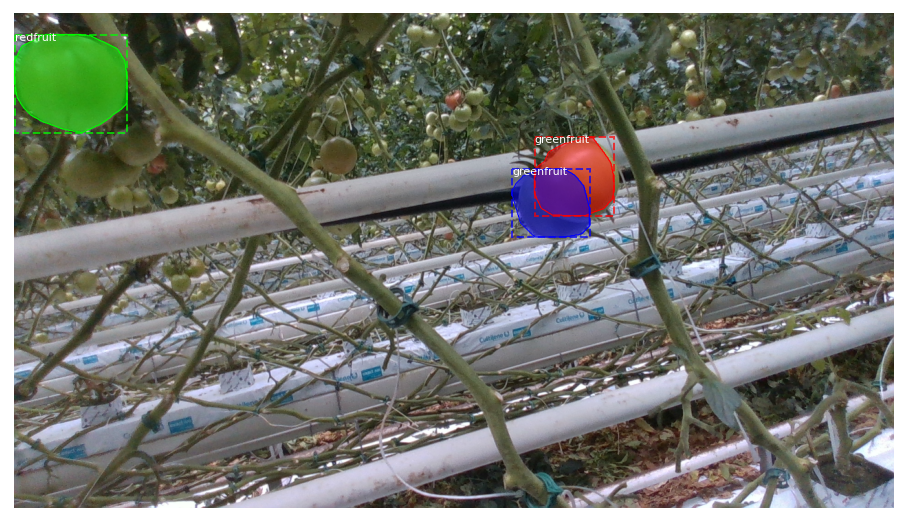

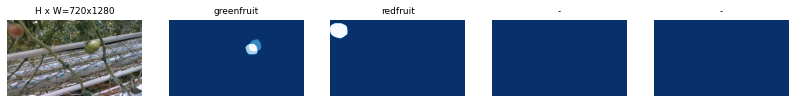

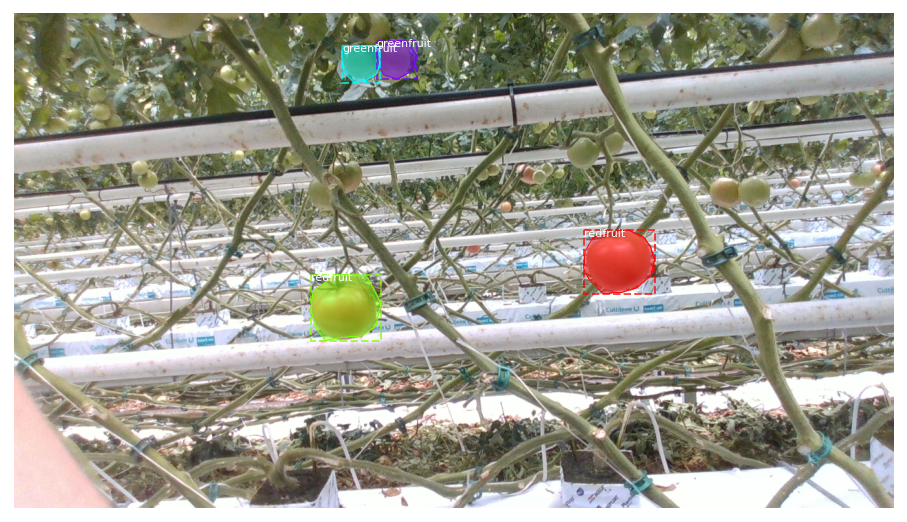

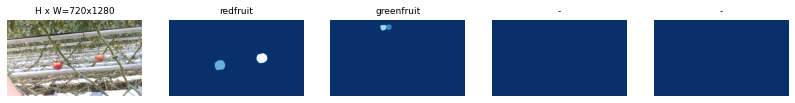

In [ ]:
image_ids = np.random.choice(train_set.image_ids, 2)
for image_id in image_ids:
    image = train_set.load_image(image_id)
    mask, class_ids = train_set.load_mask(image_id)
    bbox = utils.extract_bboxes(mask)
    visualize.display_instances(image, bbox, mask, class_ids, train_set.class_names)
    visualize.display_top_masks(image, mask, class_ids, train_set.class_names)


In [ ]:
from mrcnn.config import Config
class DatasetLearningConfig(Config):
    NAME = "tomatoJOINED"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    NUM_CLASSES = 2 + 1  # background + 2

    LEARNING_RATE = 0.001
    # All of our training images are 720x1280
    IMAGE_MIN_DIM = 720
    IMAGE_MAX_DIM = 1280
    

    # You can experiment with this number to see if it improves training
    STEPS_PER_EPOCH = 200

    # This is how often validation is run. If you are using too much hard drive space
    # on saved models (in the MODEL_DIR), try making this value larger.
    VALIDATION_STEPS = 5
    
    # can be changed to resnet101
    BACKBONE = 'resnet101'

    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)
    TRAIN_ROIS_PER_IMAGE = 32
    MAX_GT_INSTANCES = 50 
    POST_NMS_ROIS_INFERENCE = 500 
    POST_NMS_ROIS_TRAINING = 1000 
    
config = DatasetLearningConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1280
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  720
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1280 1280    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)
#weights to start with
init_with = "coco" 

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead


In [ ]:
seq = iaa.Sequential([
    iaa.Sometimes(0.4, iaa.Fliplr(0.5)), # horizontal flips
    iaa.Sometimes(0.4, iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255))),
    iaa.Sometimes(0.3, iaa.GaussianBlur(sigma=(0, 3.0))),
    iaa.Sometimes(0.3, iaa.AddToHueAndSaturation((-50, 50), per_channel=True)),
    #iaa.Sometimes(0.3, iaa.CoarseDropout(0.02, size_percent=0.05)) ,
    #iaa.Multiply((0.8, 1.3)),
    iaa.ContrastNormalization((0.75, 1.5))
], random_order=True) # apply augmenters in random order

In [ ]:
start_train = time.time()
model.train(train_set, val_set, 
            learning_rate=config.LEARNING_RATE, 
            epochs=15, 
            layers='heads')

model.train(train_set, val_set, 
            learning_rate=config.LEARNING_RATE/5, 
            epochs=30, 
            layers='4+')

model.train(train_set, val_set, 
            learning_rate=config.LEARNING_RATE/10, 
            epochs=40, 
            layers='all')
end_train = time.time()

minutes = round((end_train - start_train) / 60, 2)
print(f'Training took {minutes} minutes')
!cp -r "/content/Mask_RCNN/logs/" "/content/gdrive/MyDrive/logs/tomatoJOINED_15_30_40_ep_res101_no_aug_LR0005"


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/tomatojoined20210820T1209/mask_rcnn_tomatojoined_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
m

/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers ma

Epoch 1/15


  2/200 [..............................] - ETA: 51:27 - loss: 2.0942 - rpn_class_loss: 0.0719 - rpn_bbox_loss: 0.7557 - mrcnn_class_loss: 0.2426 - mrcnn_bbox_loss: 0.7204 - mrcnn_mask_loss: 0.3036  

  3/200 [..............................] - ETA: 36:01 - loss: 2.1610 - rpn_class_loss: 0.0766 - rpn_bbox_loss: 0.7782 - mrcnn_class_loss: 0.2886 - mrcnn_bbox_loss: 0.6687 - mrcnn_mask_loss: 0.3489

 27/200 [===>..........................] - ETA: 7:52 - loss: 2.0014 - rpn_class_loss: 0.0431 - rpn_bbox_loss: 0.7673 - mrcnn_class_loss: 0.2963 - mrcnn_bbox_loss: 0.5279 - mrcnn_mask_loss: 0.3669

 28/200 [===>..........................] - ETA: 7:43 - loss: 1.9986 - rpn_class_loss: 0.0463 - rpn_bbox_loss: 0.7755 - mrcnn_class_loss: 0.2928 - mrcnn_bbox_loss: 0.5213 - mrcnn_mask_loss: 0.3626

155/200 [======================>.......] - ETA: 1:23 - loss: 1.6787 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.7297 - mrcnn_class_loss: 0.2191 - mrcnn_bbox_loss: 0.4088 - mrcnn_mask_loss: 0.2913

156/200 [======================>.......] - ETA: 1:21 - loss: 1.6784 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.7291 - mrcnn_class_loss: 0.2196 - mrcnn_bbox_loss: 0.4085 - mrcnn_mask_loss: 0.2914

157/200 [======================>.......] - ETA: 1:20 - loss: 1.6788 - rpn_class_loss: 0.0297 - rpn_bbox_loss: 0.7295 - mrcnn_class_loss: 0.2197 - mrcnn_bbox_loss: 0.4085 - mrcnn_mask_loss: 0.2913

159/200 [======================>.......] - ETA: 1:16 - loss: 1.6830 - rpn_class_loss: 0.0296 - rpn_bbox_loss: 0.7309 - mrcnn_class_loss: 0.2218 - mrcnn_bbox_loss: 0.4087 - mrcnn_mask_loss: 0.2920

200/200 [==============================] - 373s 2s/step - loss: 1.6051 - rpn_class_loss: 0.0259 - rpn_bbox_loss: 0.7065 - mrcnn_class_loss: 0.2138 - mrcnn_bbox_loss: 0.3777 - mrcnn_mask_loss: 0.2812 - val_loss: 1.5889 - val_rpn_class_loss: 0.0135 - val_rpn_bbox_loss: 0.5991 - val_mrcnn_class_loss: 0.1718 - val_mrcnn_bbox_loss: 0.2921 - val_mrcnn_mask_loss: 0.2720

Epoch 2/15
 40/200 [=====>........................] - ETA: 4:29 - loss: 1.2406 - rpn_class_loss: 0.0122 - rpn_bbox_loss: 0.5960 - mrcnn_class_loss: 0.1622 - mrcnn_bbox_loss: 0.2467 - mrcnn_mask_loss: 0.2234

 43/200 [=====>........................] - ETA: 4:24 - loss: 1.2349 - rpn_class_loss: 0.0118 - rpn_bbox_loss: 0.5857 - mrcnn_class_loss: 0.1678 - mrcnn_bbox_loss: 0.2482 - mrcnn_mask_loss: 0.2215

 58/200 [=======>......................] - ETA: 3:59 - loss: 1.2753 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.5888 - mrcnn_class_loss: 0.2044 - mrcnn_bbox_loss: 0.2461 - mrcnn_mask_loss: 0.2227

 61/200 [========>.....................] - ETA: 3:53 - loss: 1.2914 - rpn_class_loss: 0.0131 - rpn_bbox_loss: 0.6036 - mrcnn_class_loss: 0.2030 - mrcnn_bbox_loss: 0.2473 - mrcnn_mask_loss: 0.2245

116/200 [================>.............] - ETA: 2:21 - loss: 1.2719 - rpn_class_loss: 0.0163 - rpn_bbox_loss: 0.5993 - mrcnn_class_loss: 0.2068 - mrcnn_bbox_loss: 0.2261 - mrcnn_mask_loss: 0.2234

119/200 [================>.............] - ETA: 2:16 - loss: 1.2675 - rpn_class_loss: 0.0161 - rpn_bbox_loss: 0.5948 - mrcnn_class_loss: 0.2058 - mrcnn_bbox_loss: 0.2267 - mrcnn_mask_loss: 0.2241

196/200 [============================>.] - ETA: 6s - loss: 1.2471 - rpn_class_loss: 0.0139 - rpn_bbox_loss: 0.5899 - mrcnn_class_loss: 0.1951 - mrcnn_bbox_loss: 0.2228 - mrcnn_mask_loss: 0.2253

199/200 [============================>.] - ETA: 1s - loss: 1.2456 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.5903 - mrcnn_class_loss: 0.1945 - mrcnn_bbox_loss: 0.2220 - mrcnn_mask_loss: 0.2250

200/200 [==============================] - 342s 2s/step - loss: 1.2448 - rpn_class_loss: 0.0137 - rpn_bbox_loss: 0.5903 - mrcnn_class_loss: 0.1943 - mrcnn_bbox_loss: 0.2215 - mrcnn_mask_loss: 0.2250 - val_loss: 1.2819 - val_rpn_class_loss: 0.0069 - val_rpn_bbox_loss: 0.5623 - val_mrcnn_class_loss: 0.1421 - val_mrcnn_bbox_loss: 0.1384 - val_mrcnn_mask_loss: 0.1654
Epoch 3/15
 50/200 [======>.......................] - ETA: 4:12 - loss: 1.1418 - rpn_class_loss: 0.0120 - rpn_bbox_loss: 0.5346 - mrcnn_class_loss: 0.1741 - mrcnn_bbox_loss: 0.1877 - mrcnn_mask_loss: 0.2334

 53/200 [======>.......................] - ETA: 4:07 - loss: 1.1245 - rpn_class_loss: 0.0116 - rpn_bbox_loss: 0.5258 - mrcnn_class_loss: 0.1739 - mrcnn_bbox_loss: 0.1840 - mrcnn_mask_loss: 0.2293

136/200 [===================>..........] - ETA: 1:47 - loss: 1.1278 - rpn_class_loss: 0.0116 - rpn_bbox_loss: 0.5313 - mrcnn_class_loss: 0.1827 - mrcnn_bbox_loss: 0.1833 - mrcnn_mask_loss: 0.2189

139/200 [===================>..........] - ETA: 1:42 - loss: 1.1284 - rpn_class_loss: 0.0116 - rpn_bbox_loss: 0.5308 - mrcnn_class_loss: 0.1819 - mrcnn_bbox_loss: 0.1836 - mrcnn_mask_loss: 0.2206

199/200 [============================>.] - ETA: 1s - loss: 1.1244 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.5250 - mrcnn_class_loss: 0.1813 - mrcnn_bbox_loss: 0.1853 - mrcnn_mask_loss: 0.2221

200/200 [==============================] - 341s 2s/step - loss: 1.1247 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.5240 - mrcnn_class_loss: 0.1820 - mrcnn_bbox_loss: 0.1853 - mrcnn_mask_loss: 0.2227 - val_loss: 1.2846 - val_rpn_class_loss: 0.0255 - val_rpn_bbox_loss: 0.6645 - val_mrcnn_class_loss: 0.1110 - val_mrcnn_bbox_loss: 0.1772 - val_mrcnn_mask_loss: 0.2032
Epoch 4/15
 55/200 [=======>......................] - ETA: 4:04 - loss: 1.0705 - rpn_class_loss: 0.0086 - rpn_bbox_loss: 0.4618 - mrcnn_class_loss: 0.1771 - mrcnn_bbox_loss: 0.1781 - mrcnn_mask_loss: 0.2448

 56/200 [=======>......................] - ETA: 4:02 - loss: 1.0680 - rpn_class_loss: 0.0085 - rpn_bbox_loss: 0.4591 - mrcnn_class_loss: 0.1745 - mrcnn_bbox_loss: 0.1817 - mrcnn_mask_loss: 0.2441

137/200 [===================>..........] - ETA: 1:45 - loss: 1.0539 - rpn_class_loss: 0.0091 - rpn_bbox_loss: 0.4763 - mrcnn_class_loss: 0.1678 - mrcnn_bbox_loss: 0.1705 - mrcnn_mask_loss: 0.2303

138/200 [===================>..........] - ETA: 1:44 - loss: 1.0541 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.4769 - mrcnn_class_loss: 0.1680 - mrcnn_bbox_loss: 0.1702 - mrcnn_mask_loss: 0.2300

177/200 [=========================>....] - ETA: 38s - loss: 1.0513 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.4735 - mrcnn_class_loss: 0.1702 - mrcnn_bbox_loss: 0.1714 - mrcnn_mask_loss: 0.2267

178/200 [=========================>....] - ETA: 36s - loss: 1.0488 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.4723 - mrcnn_class_loss: 0.1696 - mrcnn_bbox_loss: 0.1712 - mrcnn_mask_loss: 0.2262

200/200 [==============================] - 341s 2s/step - loss: 1.0403 - rpn_class_loss: 0.0096 - rpn_bbox_loss: 0.4695 - mrcnn_class_loss: 0.1686 - mrcnn_bbox_loss: 0.1700 - mrcnn_mask_loss: 0.2225 - val_loss: 0.5440 - val_rpn_class_loss: 0.0219 - val_rpn_bbox_loss: 0.3556 - val_mrcnn_class_loss: 0.0664 - val_mrcnn_bbox_loss: 0.1194 - val_mrcnn_mask_loss: 0.1550
Epoch 5/15
 68/200 [=========>....................] - ETA: 3:39 - loss: 1.0287 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.4735 - mrcnn_class_loss: 0.1375 - mrcnn_bbox_loss: 0.1847 - mrcnn_mask_loss: 0.2251

 71/200 [=========>....................] - ETA: 3:34 - loss: 1.0221 - rpn_class_loss: 0.0079 - rpn_bbox_loss: 0.4734 - mrcnn_class_loss: 0.1369 - mrcnn_bbox_loss: 0.1813 - mrcnn_mask_loss: 0.2226

148/200 [=====================>........] - ETA: 1:26 - loss: 0.9896 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.4489 - mrcnn_class_loss: 0.1435 - mrcnn_bbox_loss: 0.1684 - mrcnn_mask_loss: 0.2206

151/200 [=====================>........] - ETA: 1:21 - loss: 0.9923 - rpn_class_loss: 0.0082 - rpn_bbox_loss: 0.4491 - mrcnn_class_loss: 0.1431 - mrcnn_bbox_loss: 0.1694 - mrcnn_mask_loss: 0.2226

182/200 [==========================>...] - ETA: 30s - loss: 0.9786 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.4351 - mrcnn_class_loss: 0.1449 - mrcnn_bbox_loss: 0.1672 - mrcnn_mask_loss: 0.2231

185/200 [==========================>...] - ETA: 25s - loss: 0.9791 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.4359 - mrcnn_class_loss: 0.1459 - mrcnn_bbox_loss: 0.1665 - mrcnn_mask_loss: 0.2225

199/200 [============================>.] - ETA: 1s - loss: 0.9725 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.4351 - mrcnn_class_loss: 0.1453 - mrcnn_bbox_loss: 0.1637 - mrcnn_mask_loss: 0.2201

200/200 [==============================] - 340s 2s/step - loss: 0.9718 - rpn_class_loss: 0.0083 - rpn_bbox_loss: 0.4350 - mrcnn_class_loss: 0.1448 - mrcnn_bbox_loss: 0.1636 - mrcnn_mask_loss: 0.2201 - val_loss: 0.4107 - val_rpn_class_loss: 0.0170 - val_rpn_bbox_loss: 0.3582 - val_mrcnn_class_loss: 0.2119 - val_mrcnn_bbox_loss: 0.2221 - val_mrcnn_mask_loss: 0.2854
Epoch 6/15
 12/200 [>.............................] - ETA: 5:15 - loss: 0.8852 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.3627 - mrcnn_class_loss: 0.1997 - mrcnn_bbox_loss: 0.1245 - mrcnn_mask_loss: 0.1931

 15/200 [=>............................] - ETA: 5:09 - loss: 0.8815 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.3479 - mrcnn_class_loss: 0.2034 - mrcnn_bbox_loss: 0.1177 - mrcnn_mask_loss: 0.2071

 16/200 [=>............................] - ETA: 5:08 - loss: 0.9037 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.3609 - mrcnn_class_loss: 0.2083 - mrcnn_bbox_loss: 0.1194 - mrcnn_mask_loss: 0.2097

 19/200 [=>............................] - ETA: 5:04 - loss: 0.8648 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.3512 - mrcnn_class_loss: 0.1911 - mrcnn_bbox_loss: 0.1137 - mrcnn_mask_loss: 0.2037

 39/200 [====>.........................] - ETA: 4:31 - loss: 0.8374 - rpn_class_loss: 0.0103 - rpn_bbox_loss: 0.3360 - mrcnn_class_loss: 0.1648 - mrcnn_bbox_loss: 0.1199 - mrcnn_mask_loss: 0.2063

 40/200 [=====>........................] - ETA: 4:29 - loss: 0.8351 - rpn_class_loss: 0.0105 - rpn_bbox_loss: 0.3313 - mrcnn_class_loss: 0.1643 - mrcnn_bbox_loss: 0.1224 - mrcnn_mask_loss: 0.2066

100/200 [==============>...............] - ETA: 2:48 - loss: 0.8831 - rpn_class_loss: 0.0104 - rpn_bbox_loss: 0.3765 - mrcnn_class_loss: 0.1486 - mrcnn_bbox_loss: 0.1357 - mrcnn_mask_loss: 0.2119

103/200 [==============>...............] - ETA: 2:43 - loss: 0.8874 - rpn_class_loss: 0.0108 - rpn_bbox_loss: 0.3777 - mrcnn_class_loss: 0.1480 - mrcnn_bbox_loss: 0.1366 - mrcnn_mask_loss: 0.2143

199/200 [============================>.] - ETA: 1s - loss: 0.8987 - rpn_class_loss: 0.0102 - rpn_bbox_loss: 0.3846 - mrcnn_class_loss: 0.1410 - mrcnn_bbox_loss: 0.1421 - mrcnn_mask_loss: 0.2209

200/200 [==============================] - 341s 2s/step - loss: 0.8976 - rpn_class_loss: 0.0102 - rpn_bbox_loss: 0.3846 - mrcnn_class_loss: 0.1407 - mrcnn_bbox_loss: 0.1418 - mrcnn_mask_loss: 0.2205 - val_loss: 1.1403 - val_rpn_class_loss: 0.0152 - val_rpn_bbox_loss: 0.4101 - val_mrcnn_class_loss: 0.1125 - val_mrcnn_bbox_loss: 0.2086 - val_mrcnn_mask_loss: 0.2962
Epoch 7/15
142/200 [====================>.........] - ETA: 1:37 - loss: 0.7684 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.2903 - mrcnn_class_loss: 0.1269 - mrcnn_bbox_loss: 0.1354 - mrcnn_mask_loss: 0.2089

145/200 [====================>.........] - ETA: 1:32 - loss: 0.7750 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.2928 - mrcnn_class_loss: 0.1292 - mrcnn_bbox_loss: 0.1354 - mrcnn_mask_loss: 0.2106

200/200 [==============================] - 341s 2s/step - loss: 0.8165 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.3130 - mrcnn_class_loss: 0.1411 - mrcnn_bbox_loss: 0.1402 - mrcnn_mask_loss: 0.2138 - val_loss: 1.1103 - val_rpn_class_loss: 0.0276 - val_rpn_bbox_loss: 0.6337 - val_mrcnn_class_loss: 0.2199 - val_mrcnn_bbox_loss: 0.1985 - val_mrcnn_mask_loss: 0.2250
Epoch 8/15
174/200 [=========================>....] - ETA: 43s - loss: 0.8559 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.3387 - mrcnn_class_loss: 0.1573 - mrcnn_bbox_loss: 0.1419 - mrcnn_mask_loss: 0.2090

177/200 [=========================>....] - ETA: 38s - loss: 0.8632 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.3403 - mrcnn_class_loss: 0.1610 - mrcnn_bbox_loss: 0.1432 - mrcnn_mask_loss: 0.2097

190/200 [===========================>..] - ETA: 16s - loss: 0.8616 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.3435 - mrcnn_class_loss: 0.1583 - mrcnn_bbox_loss: 0.1413 - mrcnn_mask_loss: 0.2092

193/200 [===========================>..] - ETA: 11s - loss: 0.8587 - rpn_class_loss: 0.0095 - rpn_bbox_loss: 0.3429 - mrcnn_class_loss: 0.1566 - mrcnn_bbox_loss: 0.1410 - mrcnn_mask_loss: 0.2088

200/200 [==============================] - 341s 2s/step - loss: 0.8553 - rpn_class_loss: 0.0094 - rpn_bbox_loss: 0.3440 - mrcnn_class_loss: 0.1542 - mrcnn_bbox_loss: 0.1400 - mrcnn_mask_loss: 0.2077 - val_loss: 1.4248 - val_rpn_class_loss: 0.0242 - val_rpn_bbox_loss: 0.5048 - val_mrcnn_class_loss: 0.1562 - val_mrcnn_bbox_loss: 0.1728 - val_mrcnn_mask_loss: 0.2909
Epoch 9/15
112/200 [===============>..............] - ETA: 2:26 - loss: 0.8400 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.3305 - mrcnn_class_loss: 0.1731 - mrcnn_bbox_loss: 0.1282 - mrcnn_mask_loss: 0.2011

115/200 [================>.............] - ETA: 2:21 - loss: 0.8342 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.3275 - mrcnn_class_loss: 0.1706 - mrcnn_bbox_loss: 0.1283 - mrcnn_mask_loss: 0.2008

152/200 [=====================>........] - ETA: 1:20 - loss: 0.8513 - rpn_class_loss: 0.0076 - rpn_bbox_loss: 0.3338 - mrcnn_class_loss: 0.1691 - mrcnn_bbox_loss: 0.1336 - mrcnn_mask_loss: 0.2072

155/200 [======================>.......] - ETA: 1:15 - loss: 0.8564 - rpn_class_loss: 0.0075 - rpn_bbox_loss: 0.3376 - mrcnn_class_loss: 0.1676 - mrcnn_bbox_loss: 0.1359 - mrcnn_mask_loss: 0.2077

200/200 [==============================] - 339s 2s/step - loss: 0.8657 - rpn_class_loss: 0.0082 - rpn_bbox_loss: 0.3368 - mrcnn_class_loss: 0.1764 - mrcnn_bbox_loss: 0.1358 - mrcnn_mask_loss: 0.2085 - val_loss: 1.2483 - val_rpn_class_loss: 0.0070 - val_rpn_bbox_loss: 0.4226 - val_mrcnn_class_loss: 0.2059 - val_mrcnn_bbox_loss: 0.2319 - val_mrcnn_mask_loss: 0.3028
Epoch 10/15
  2/200 [..............................] - ETA: 5:27 - loss: 0.6856 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.3201 - mrcnn_class_loss: 0.0629 - mrcnn_bbox_loss: 0.1249 - mrcnn_mask_loss: 0.1743

  5/200 [..............................] - ETA: 5:23 - loss: 0.7127 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.2693 - mrcnn_class_loss: 0.1277 - mrcnn_bbox_loss: 0.1178 - mrcnn_mask_loss: 0.1941

 70/200 [=========>....................] - ETA: 3:36 - loss: 0.8130 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.3284 - mrcnn_class_loss: 0.1443 - mrcnn_bbox_loss: 0.1284 - mrcnn_mask_loss: 0.2056

 73/200 [=========>....................] - ETA: 3:31 - loss: 0.8179 - rpn_class_loss: 0.0066 - rpn_bbox_loss: 0.3332 - mrcnn_class_loss: 0.1421 - mrcnn_bbox_loss: 0.1292 - mrcnn_mask_loss: 0.2069

200/200 [==============================] - 340s 2s/step - loss: 0.8205 - rpn_class_loss: 0.0066 - rpn_bbox_loss: 0.3320 - mrcnn_class_loss: 0.1417 - mrcnn_bbox_loss: 0.1333 - mrcnn_mask_loss: 0.2068 - val_loss: 0.7185 - val_rpn_class_loss: 0.0065 - val_rpn_bbox_loss: 0.2725 - val_mrcnn_class_loss: 0.1306 - val_mrcnn_bbox_loss: 0.1336 - val_mrcnn_mask_loss: 0.2389
Epoch 11/15
 54/200 [=======>......................] - ETA: 4:06 - loss: 0.7049 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.2784 - mrcnn_class_loss: 0.1146 - mrcnn_bbox_loss: 0.1159 - mrcnn_mask_loss: 0.1896

 57/200 [=======>......................] - ETA: 4:01 - loss: 0.7003 - rpn_class_loss: 0.0064 - rpn_bbox_loss: 0.2772 - mrcnn_class_loss: 0.1160 - mrcnn_bbox_loss: 0.1137 - mrcnn_mask_loss: 0.1870

 88/200 [============>.................] - ETA: 3:09 - loss: 0.6886 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.2612 - mrcnn_class_loss: 0.1181 - mrcnn_bbox_loss: 0.1155 - mrcnn_mask_loss: 0.1880

 91/200 [============>.................] - ETA: 3:04 - loss: 0.6867 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.2583 - mrcnn_class_loss: 0.1163 - mrcnn_bbox_loss: 0.1163 - mrcnn_mask_loss: 0.1901

136/200 [===================>..........] - ETA: 1:47 - loss: 0.7226 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.2721 - mrcnn_class_loss: 0.1203 - mrcnn_bbox_loss: 0.1218 - mrcnn_mask_loss: 0.2029

139/200 [===================>..........] - ETA: 1:42 - loss: 0.7212 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.2711 - mrcnn_class_loss: 0.1201 - mrcnn_bbox_loss: 0.1216 - mrcnn_mask_loss: 0.2029

152/200 [=====================>........] - ETA: 1:20 - loss: 0.7298 - rpn_class_loss: 0.0060 - rpn_bbox_loss: 0.2783 - mrcnn_class_loss: 0.1187 - mrcnn_bbox_loss: 0.1222 - mrcnn_mask_loss: 0.2046

154/200 [======================>.......] - ETA: 1:17 - loss: 0.7298 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.2789 - mrcnn_class_loss: 0.1183 - mrcnn_bbox_loss: 0.1221 - mrcnn_mask_loss: 0.2044

155/200 [======================>.......] - ETA: 1:15 - loss: 0.7304 - rpn_class_loss: 0.0061 - rpn_bbox_loss: 0.2785 - mrcnn_class_loss: 0.1186 - mrcnn_bbox_loss: 0.1223 - mrcnn_mask_loss: 0.2049

157/200 [======================>.......] - ETA: 1:12 - loss: 0.7330 - rpn_class_loss: 0.0062 - rpn_bbox_loss: 0.2802 - mrcnn_class_loss: 0.1193 - mrcnn_bbox_loss: 0.1222 - mrcnn_mask_loss: 0.2051

200/200 [==============================] - 341s 2s/step - loss: 0.7467 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.2869 - mrcnn_class_loss: 0.1261 - mrcnn_bbox_loss: 0.1214 - mrcnn_mask_loss: 0.2053 - val_loss: 1.0864 - val_rpn_class_loss: 8.2208e-04 - val_rpn_bbox_loss: 0.1920 - val_mrcnn_class_loss: 0.2680 - val_mrcnn_bbox_loss: 0.1154 - val_mrcnn_mask_loss: 0.1871
Epoch 12/15
  5/200 [..............................] - ETA: 5:32 - loss: 0.6725 - rpn_class_loss: 0.0068 - rpn_bbox_loss: 0.2591 - mrcnn_class_loss: 0.1005 - mrcnn_bbox_loss: 0.1156 - mrcnn_mask_loss: 0.1905

 10/200 [>.............................] - ETA: 5:21 - loss: 0.5980 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.2265 - mrcnn_class_loss: 0.0850 - mrcnn_bbox_loss: 0.1053 - mrcnn_mask_loss: 0.1753

163/200 [=======================>......] - ETA: 1:02 - loss: 0.7011 - rpn_class_loss: 0.0071 - rpn_bbox_loss: 0.2430 - mrcnn_class_loss: 0.1394 - mrcnn_bbox_loss: 0.1143 - mrcnn_mask_loss: 0.1972

168/200 [========================>.....] - ETA: 53s - loss: 0.6979 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.2416 - mrcnn_class_loss: 0.1397 - mrcnn_bbox_loss: 0.1136 - mrcnn_mask_loss: 0.1958

200/200 [==============================] - 341s 2s/step - loss: 0.6949 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.2457 - mrcnn_class_loss: 0.1335 - mrcnn_bbox_loss: 0.1125 - mrcnn_mask_loss: 0.1960 - val_loss: 0.3998 - val_rpn_class_loss: 0.0034 - val_rpn_bbox_loss: 0.2858 - val_mrcnn_class_loss: 0.0431 - val_mrcnn_bbox_loss: 0.1633 - val_mrcnn_mask_loss: 0.1627
Epoch 13/15
  5/200 [..............................] - ETA: 5:25 - loss: 0.7473 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2155 - mrcnn_class_loss: 0.1453 - mrcnn_bbox_loss: 0.1315 - mrcnn_mask_loss: 0.2497

 10/200 [>.............................] - ETA: 5:17 - loss: 0.7663 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.2176 - mrcnn_class_loss: 0.1392 - mrcnn_bbox_loss: 0.1492 - mrcnn_mask_loss: 0.2553

 65/200 [========>.....................] - ETA: 3:46 - loss: 0.6856 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.2267 - mrcnn_class_loss: 0.1205 - mrcnn_bbox_loss: 0.1240 - mrcnn_mask_loss: 0.2098

 70/200 [=========>....................] - ETA: 3:38 - loss: 0.6788 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.2235 - mrcnn_class_loss: 0.1176 - mrcnn_bbox_loss: 0.1233 - mrcnn_mask_loss: 0.2100

153/200 [=====================>........] - ETA: 1:18 - loss: 0.6911 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2302 - mrcnn_class_loss: 0.1231 - mrcnn_bbox_loss: 0.1221 - mrcnn_mask_loss: 0.2103

157/200 [======================>.......] - ETA: 1:12 - loss: 0.6920 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2301 - mrcnn_class_loss: 0.1223 - mrcnn_bbox_loss: 0.1229 - mrcnn_mask_loss: 0.2113

171/200 [========================>.....] - ETA: 48s - loss: 0.6976 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2337 - mrcnn_class_loss: 0.1224 - mrcnn_bbox_loss: 0.1233 - mrcnn_mask_loss: 0.2129

176/200 [=========================>....] - ETA: 40s - loss: 0.6953 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2355 - mrcnn_class_loss: 0.1210 - mrcnn_bbox_loss: 0.1221 - mrcnn_mask_loss: 0.2114

200/200 [==============================] - 341s 2s/step - loss: 0.7019 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.2435 - mrcnn_class_loss: 0.1228 - mrcnn_bbox_loss: 0.1200 - mrcnn_mask_loss: 0.2101 - val_loss: 0.5371 - val_rpn_class_loss: 0.0222 - val_rpn_bbox_loss: 0.4398 - val_mrcnn_class_loss: 0.2120 - val_mrcnn_bbox_loss: 0.1543 - val_mrcnn_mask_loss: 0.2533
Epoch 14/15
126/200 [=================>............] - ETA: 2:03 - loss: 0.7024 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2544 - mrcnn_class_loss: 0.1178 - mrcnn_bbox_loss: 0.1121 - mrcnn_mask_loss: 0.2119

133/200 [==================>...........] - ETA: 1:52 - loss: 0.6971 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.2498 - mrcnn_class_loss: 0.1175 - mrcnn_bbox_loss: 0.1124 - mrcnn_mask_loss: 0.2111

200/200 [==============================] - 340s 2s/step - loss: 0.7098 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.2594 - mrcnn_class_loss: 0.1224 - mrcnn_bbox_loss: 0.1151 - mrcnn_mask_loss: 0.2059 - val_loss: 0.6797 - val_rpn_class_loss: 0.0029 - val_rpn_bbox_loss: 0.2616 - val_mrcnn_class_loss: 0.1964 - val_mrcnn_bbox_loss: 0.1866 - val_mrcnn_mask_loss: 0.2236
Epoch 15/15
 24/200 [==>...........................] - ETA: 4:54 - loss: 0.6358 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1956 - mrcnn_class_loss: 0.1318 - mrcnn_bbox_loss: 0.1079 - mrcnn_mask_loss: 0.1954

 31/200 [===>..........................] - ETA: 4:43 - loss: 0.6476 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1968 - mrcnn_class_loss: 0.1317 - mrcnn_bbox_loss: 0.1161 - mrcnn_mask_loss: 0.1978

120/200 [=================>............] - ETA: 2:13 - loss: 0.7326 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2360 - mrcnn_class_loss: 0.1451 - mrcnn_bbox_loss: 0.1291 - mrcnn_mask_loss: 0.2170

127/200 [==================>...........] - ETA: 2:02 - loss: 0.7260 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.2340 - mrcnn_class_loss: 0.1433 - mrcnn_bbox_loss: 0.1282 - mrcnn_mask_loss: 0.2152

200/200 [==============================] - 341s 2s/step - loss: 0.7020 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.2280 - mrcnn_class_loss: 0.1322 - mrcnn_bbox_loss: 0.1226 - mrcnn_mask_loss: 0.2138 - val_loss: 0.6136 - val_rpn_class_loss: 0.0069 - val_rpn_bbox_loss: 0.1661 - val_mrcnn_class_loss: 0.1540 - val_mrcnn_bbox_loss: 0.1212 - val_mrcnn_mask_loss: 0.1680

Starting at epoch 15. LR=0.0002

Checkpoint Path: /content/Mask_RCNN/logs/tomatojoined20210820T1209/mask_rcnn_tomatojoined_{epoch:04d}.h5
Selecting layers to train
res4a_branch2a         (Conv2D)
bn4a_branch2a          (BatchNorm)
res4a_branch2b         (Conv2D)
bn4a_branch2b          (BatchNorm)
res4a_branch2c         (Conv2D)
res4a_branch1          (Conv2D)
bn4a_branch2c          (BatchNorm)
bn4a_branch1           (BatchNorm)
res4b_branch2a         (Conv2D)
bn4b_branch2a          (BatchNorm)
res4b_branch2b         (Conv2D)
bn4b_branch2b          (BatchNorm)
res4b_branch2c         (Conv2D)
bn4b_branch2c          (BatchNorm)


/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers ma

Epoch 16/30
 27/200 [===>..........................] - ETA: 9:38 - loss: 0.7859 - rpn_class_loss: 0.0077 - rpn_bbox_loss: 0.2496 - mrcnn_class_loss: 0.1372 - mrcnn_bbox_loss: 0.1417 - mrcnn_mask_loss: 0.2498

 28/200 [===>..........................] - ETA: 9:30 - loss: 0.7973 - rpn_class_loss: 0.0084 - rpn_bbox_loss: 0.2583 - mrcnn_class_loss: 0.1410 - mrcnn_bbox_loss: 0.1409 - mrcnn_mask_loss: 0.2487

155/200 [======================>.......] - ETA: 1:59 - loss: 0.6877 - rpn_class_loss: 0.0080 - rpn_bbox_loss: 0.2376 - mrcnn_class_loss: 0.1235 - mrcnn_bbox_loss: 0.1113 - mrcnn_mask_loss: 0.2072

156/200 [======================>.......] - ETA: 1:56 - loss: 0.6868 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.2371 - mrcnn_class_loss: 0.1231 - mrcnn_bbox_loss: 0.1112 - mrcnn_mask_loss: 0.2073

157/200 [======================>.......] - ETA: 1:53 - loss: 0.6871 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.2372 - mrcnn_class_loss: 0.1232 - mrcnn_bbox_loss: 0.1113 - mrcnn_mask_loss: 0.2072

158/200 [======================>.......] - ETA: 1:51 - loss: 0.6884 - rpn_class_loss: 0.0081 - rpn_bbox_loss: 0.2372 - mrcnn_class_loss: 0.1235 - mrcnn_bbox_loss: 0.1119 - mrcnn_mask_loss: 0.2077

200/200 [==============================] - 533s 3s/step - loss: 0.6745 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.2267 - mrcnn_class_loss: 0.1216 - mrcnn_bbox_loss: 0.1110 - mrcnn_mask_loss: 0.2080 - val_loss: 0.6778 - val_rpn_class_loss: 0.0045 - val_rpn_bbox_loss: 0.2415 - val_mrcnn_class_loss: 0.1896 - val_mrcnn_bbox_loss: 0.1173 - val_mrcnn_mask_loss: 0.1586
Epoch 17/30
 41/200 [=====>........................] - ETA: 6:38 - loss: 0.5618 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1724 - mrcnn_class_loss: 0.0939 - mrcnn_bbox_loss: 0.1015 - mrcnn_mask_loss: 0.1890

 42/200 [=====>........................] - ETA: 6:36 - loss: 0.5591 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1719 - mrcnn_class_loss: 0.0945 - mrcnn_bbox_loss: 0.1004 - mrcnn_mask_loss: 0.1875

 59/200 [=======>......................] - ETA: 5:53 - loss: 0.5647 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.1991 - mrcnn_class_loss: 0.0920 - mrcnn_bbox_loss: 0.0905 - mrcnn_mask_loss: 0.1775

 60/200 [========>.....................] - ETA: 5:51 - loss: 0.5608 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.1994 - mrcnn_class_loss: 0.0906 - mrcnn_bbox_loss: 0.0893 - mrcnn_mask_loss: 0.1760

117/200 [================>.............] - ETA: 3:28 - loss: 0.5702 - rpn_class_loss: 0.0068 - rpn_bbox_loss: 0.1983 - mrcnn_class_loss: 0.0952 - mrcnn_bbox_loss: 0.0885 - mrcnn_mask_loss: 0.1814

118/200 [================>.............] - ETA: 3:25 - loss: 0.5681 - rpn_class_loss: 0.0067 - rpn_bbox_loss: 0.1970 - mrcnn_class_loss: 0.0947 - mrcnn_bbox_loss: 0.0884 - mrcnn_mask_loss: 0.1813

197/200 [============================>.] - ETA: 7s - loss: 0.5737 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.1923 - mrcnn_class_loss: 0.0983 - mrcnn_bbox_loss: 0.0911 - mrcnn_mask_loss: 0.1862 

198/200 [============================>.] - ETA: 5s - loss: 0.5734 - rpn_class_loss: 0.0058 - rpn_bbox_loss: 0.1920 - mrcnn_class_loss: 0.0983 - mrcnn_bbox_loss: 0.0910 - mrcnn_mask_loss: 0.1862

200/200 [==============================] - 507s 3s/step - loss: 0.5715 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.1916 - mrcnn_class_loss: 0.0980 - mrcnn_bbox_loss: 0.0905 - mrcnn_mask_loss: 0.1855 - val_loss: 1.1769 - val_rpn_class_loss: 0.0029 - val_rpn_bbox_loss: 0.2988 - val_mrcnn_class_loss: 0.0827 - val_mrcnn_bbox_loss: 0.0918 - val_mrcnn_mask_loss: 0.1856
Epoch 18/30
 51/200 [======>.......................] - ETA: 6:12 - loss: 0.5439 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.1590 - mrcnn_class_loss: 0.1000 - mrcnn_bbox_loss: 0.0945 - mrcnn_mask_loss: 0.1869

 52/200 [======>.......................] - ETA: 6:09 - loss: 0.5382 - rpn_class_loss: 0.0033 - rpn_bbox_loss: 0.1569 - mrcnn_class_loss: 0.0984 - mrcnn_bbox_loss: 0.0940 - mrcnn_mask_loss: 0.1857

137/200 [===================>..........] - ETA: 2:37 - loss: 0.5373 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1693 - mrcnn_class_loss: 0.0897 - mrcnn_bbox_loss: 0.0908 - mrcnn_mask_loss: 0.1830

138/200 [===================>..........] - ETA: 2:34 - loss: 0.5388 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1705 - mrcnn_class_loss: 0.0896 - mrcnn_bbox_loss: 0.0909 - mrcnn_mask_loss: 0.1833

199/200 [============================>.] - ETA: 2s - loss: 0.5617 - rpn_class_loss: 0.0048 - rpn_bbox_loss: 0.1769 - mrcnn_class_loss: 0.0979 - mrcnn_bbox_loss: 0.0945 - mrcnn_mask_loss: 0.1876

200/200 [==============================] - 504s 3s/step - loss: 0.5651 - rpn_class_loss: 0.0048 - rpn_bbox_loss: 0.1774 - mrcnn_class_loss: 0.0993 - mrcnn_bbox_loss: 0.0951 - mrcnn_mask_loss: 0.1885 - val_loss: 1.5222 - val_rpn_class_loss: 0.0107 - val_rpn_bbox_loss: 0.2627 - val_mrcnn_class_loss: 0.1672 - val_mrcnn_bbox_loss: 0.1139 - val_mrcnn_mask_loss: 0.2163
Epoch 19/30
 55/200 [=======>......................] - ETA: 6:03 - loss: 0.5758 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1613 - mrcnn_class_loss: 0.1038 - mrcnn_bbox_loss: 0.0938 - mrcnn_mask_loss: 0.2124

 56/200 [=======>......................] - ETA: 6:01 - loss: 0.5807 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1621 - mrcnn_class_loss: 0.1048 - mrcnn_bbox_loss: 0.0945 - mrcnn_mask_loss: 0.2148

137/200 [===================>..........] - ETA: 2:37 - loss: 0.5739 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1723 - mrcnn_class_loss: 0.1093 - mrcnn_bbox_loss: 0.0905 - mrcnn_mask_loss: 0.1976

138/200 [===================>..........] - ETA: 2:34 - loss: 0.5721 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1712 - mrcnn_class_loss: 0.1090 - mrcnn_bbox_loss: 0.0901 - mrcnn_mask_loss: 0.1975

177/200 [=========================>....] - ETA: 57s - loss: 0.5642 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1713 - mrcnn_class_loss: 0.1053 - mrcnn_bbox_loss: 0.0899 - mrcnn_mask_loss: 0.1934

178/200 [=========================>....] - ETA: 54s - loss: 0.5632 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1708 - mrcnn_class_loss: 0.1051 - mrcnn_bbox_loss: 0.0897 - mrcnn_mask_loss: 0.1932

200/200 [==============================] - 505s 3s/step - loss: 0.5617 - rpn_class_loss: 0.0044 - rpn_bbox_loss: 0.1676 - mrcnn_class_loss: 0.1037 - mrcnn_bbox_loss: 0.0918 - mrcnn_mask_loss: 0.1942 - val_loss: 0.3241 - val_rpn_class_loss: 0.0102 - val_rpn_bbox_loss: 0.2033 - val_mrcnn_class_loss: 0.0607 - val_mrcnn_bbox_loss: 0.0546 - val_mrcnn_mask_loss: 0.1314
Epoch 20/30
 69/200 [=========>....................] - ETA: 5:27 - loss: 0.5477 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.1759 - mrcnn_class_loss: 0.1058 - mrcnn_bbox_loss: 0.0770 - mrcnn_mask_loss: 0.1856

 70/200 [=========>....................] - ETA: 5:24 - loss: 0.5430 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.1739 - mrcnn_class_loss: 0.1048 - mrcnn_bbox_loss: 0.0762 - mrcnn_mask_loss: 0.1848

149/200 [=====================>........] - ETA: 2:07 - loss: 0.5399 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.1663 - mrcnn_class_loss: 0.0994 - mrcnn_bbox_loss: 0.0810 - mrcnn_mask_loss: 0.1893

150/200 [=====================>........] - ETA: 2:04 - loss: 0.5393 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.1656 - mrcnn_class_loss: 0.0995 - mrcnn_bbox_loss: 0.0807 - mrcnn_mask_loss: 0.1895

182/200 [==========================>...] - ETA: 44s - loss: 0.5355 - rpn_class_loss: 0.0041 - rpn_bbox_loss: 0.1617 - mrcnn_class_loss: 0.0960 - mrcnn_bbox_loss: 0.0822 - mrcnn_mask_loss: 0.1915

185/200 [==========================>...] - ETA: 37s - loss: 0.5380 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.1635 - mrcnn_class_loss: 0.0976 - mrcnn_bbox_loss: 0.0820 - mrcnn_mask_loss: 0.1909

200/200 [==============================] - 504s 3s/step - loss: 0.5324 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.1614 - mrcnn_class_loss: 0.0982 - mrcnn_bbox_loss: 0.0802 - mrcnn_mask_loss: 0.1887 - val_loss: 0.1778 - val_rpn_class_loss: 0.0133 - val_rpn_bbox_loss: 0.1996 - val_mrcnn_class_loss: 0.0464 - val_mrcnn_bbox_loss: 0.1553 - val_mrcnn_mask_loss: 0.3633
Epoch 21/30
 12/200 [>.............................] - ETA: 7:48 - loss: 0.5054 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.1594 - mrcnn_class_loss: 0.1025 - mrcnn_bbox_loss: 0.0733 - mrcnn_mask_loss: 0.1673

 15/200 [=>............................] - ETA: 7:41 - loss: 0.5120 - rpn_class_loss: 0.0029 - rpn_bbox_loss: 0.1495 - mrcnn_class_loss: 0.0907 - mrcnn_bbox_loss: 0.0655 - mrcnn_mask_loss: 0.2035

 16/200 [=>............................] - ETA: 7:38 - loss: 0.4965 - rpn_class_loss: 0.0027 - rpn_bbox_loss: 0.1449 - mrcnn_class_loss: 0.0854 - mrcnn_bbox_loss: 0.0630 - mrcnn_mask_loss: 0.2005

 19/200 [=>............................] - ETA: 7:30 - loss: 0.4975 - rpn_class_loss: 0.0028 - rpn_bbox_loss: 0.1479 - mrcnn_class_loss: 0.0817 - mrcnn_bbox_loss: 0.0666 - mrcnn_mask_loss: 0.1986

 38/200 [====>.........................] - ETA: 6:43 - loss: 0.4748 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1309 - mrcnn_class_loss: 0.0926 - mrcnn_bbox_loss: 0.0635 - mrcnn_mask_loss: 0.1826

 41/200 [=====>........................] - ETA: 6:35 - loss: 0.4743 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1285 - mrcnn_class_loss: 0.0986 - mrcnn_bbox_loss: 0.0614 - mrcnn_mask_loss: 0.1807

100/200 [==============>...............] - ETA: 4:09 - loss: 0.4948 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.1419 - mrcnn_class_loss: 0.0831 - mrcnn_bbox_loss: 0.0778 - mrcnn_mask_loss: 0.1869

103/200 [==============>...............] - ETA: 4:01 - loss: 0.5030 - rpn_class_loss: 0.0054 - rpn_bbox_loss: 0.1435 - mrcnn_class_loss: 0.0848 - mrcnn_bbox_loss: 0.0805 - mrcnn_mask_loss: 0.1887

199/200 [============================>.] - ETA: 2s - loss: 0.5142 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1469 - mrcnn_class_loss: 0.0873 - mrcnn_bbox_loss: 0.0823 - mrcnn_mask_loss: 0.1929

200/200 [==============================] - 503s 3s/step - loss: 0.5135 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1468 - mrcnn_class_loss: 0.0870 - mrcnn_bbox_loss: 0.0821 - mrcnn_mask_loss: 0.1927 - val_loss: 1.0522 - val_rpn_class_loss: 0.0054 - val_rpn_bbox_loss: 0.2755 - val_mrcnn_class_loss: 0.0832 - val_mrcnn_bbox_loss: 0.1228 - val_mrcnn_mask_loss: 0.2142
Epoch 22/30
142/200 [====================>.........] - ETA: 2:25 - loss: 0.4505 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1128 - mrcnn_class_loss: 0.0850 - mrcnn_bbox_loss: 0.0718 - mrcnn_mask_loss: 0.1773

145/200 [====================>.........] - ETA: 2:17 - loss: 0.4541 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1145 - mrcnn_class_loss: 0.0848 - mrcnn_bbox_loss: 0.0727 - mrcnn_mask_loss: 0.1786

200/200 [==============================] - 506s 3s/step - loss: 0.4800 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1260 - mrcnn_class_loss: 0.0875 - mrcnn_bbox_loss: 0.0771 - mrcnn_mask_loss: 0.1848 - val_loss: 0.7407 - val_rpn_class_loss: 0.0170 - val_rpn_bbox_loss: 0.4171 - val_mrcnn_class_loss: 0.1459 - val_mrcnn_bbox_loss: 0.1624 - val_mrcnn_mask_loss: 0.2241
Epoch 23/30
174/200 [=========================>....] - ETA: 1:05 - loss: 0.4929 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1277 - mrcnn_class_loss: 0.1034 - mrcnn_bbox_loss: 0.0780 - mrcnn_mask_loss: 0.1789

177/200 [=========================>....] - ETA: 57s - loss: 0.4993 - rpn_class_loss: 0.0050 - rpn_bbox_loss: 0.1293 - mrcnn_class_loss: 0.1053 - mrcnn_bbox_loss: 0.0794 - mrcnn_mask_loss: 0.1804 

190/200 [===========================>..] - ETA: 25s - loss: 0.5049 - rpn_class_loss: 0.0052 - rpn_bbox_loss: 0.1310 - mrcnn_class_loss: 0.1072 - mrcnn_bbox_loss: 0.0797 - mrcnn_mask_loss: 0.1819

193/200 [===========================>..] - ETA: 17s - loss: 0.5017 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.1300 - mrcnn_class_loss: 0.1059 - mrcnn_bbox_loss: 0.0792 - mrcnn_mask_loss: 0.1814

200/200 [==============================] - 506s 3s/step - loss: 0.4992 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.1306 - mrcnn_class_loss: 0.1044 - mrcnn_bbox_loss: 0.0788 - mrcnn_mask_loss: 0.1801 - val_loss: 0.8302 - val_rpn_class_loss: 0.0088 - val_rpn_bbox_loss: 0.2792 - val_mrcnn_class_loss: 0.1203 - val_mrcnn_bbox_loss: 0.0942 - val_mrcnn_mask_loss: 0.1887
Epoch 24/30
112/200 [===============>..............] - ETA: 3:39 - loss: 0.4556 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.1255 - mrcnn_class_loss: 0.0880 - mrcnn_bbox_loss: 0.0682 - mrcnn_mask_loss: 0.1704

115/200 [================>.............] - ETA: 3:32 - loss: 0.4541 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.1239 - mrcnn_class_loss: 0.0872 - mrcnn_bbox_loss: 0.0684 - mrcnn_mask_loss: 0.1711

152/200 [=====================>........] - ETA: 2:00 - loss: 0.4681 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1320 - mrcnn_class_loss: 0.0877 - mrcnn_bbox_loss: 0.0707 - mrcnn_mask_loss: 0.1740

155/200 [======================>.......] - ETA: 1:52 - loss: 0.4707 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1359 - mrcnn_class_loss: 0.0869 - mrcnn_bbox_loss: 0.0706 - mrcnn_mask_loss: 0.1736

200/200 [==============================] - 506s 3s/step - loss: 0.4867 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1386 - mrcnn_class_loss: 0.0899 - mrcnn_bbox_loss: 0.0750 - mrcnn_mask_loss: 0.1790 - val_loss: 0.9950 - val_rpn_class_loss: 0.0076 - val_rpn_bbox_loss: 0.3616 - val_mrcnn_class_loss: 0.1774 - val_mrcnn_bbox_loss: 0.1889 - val_mrcnn_mask_loss: 0.2755
Epoch 25/30
  2/200 [..............................] - ETA: 8:10 - loss: 0.3462 - rpn_class_loss: 8.3272e-04 - rpn_bbox_loss: 0.1149 - mrcnn_class_loss: 0.0649 - mrcnn_bbox_loss: 0.0383 - mrcnn_mask_loss: 0.1271

  5/200 [..............................] - ETA: 8:07 - loss: 0.3535 - rpn_class_loss: 9.7324e-04 - rpn_bbox_loss: 0.0952 - mrcnn_class_loss: 0.0682 - mrcnn_bbox_loss: 0.0467 - mrcnn_mask_loss: 0.1424

 70/200 [=========>....................] - ETA: 5:25 - loss: 0.4805 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1233 - mrcnn_class_loss: 0.1012 - mrcnn_bbox_loss: 0.0702 - mrcnn_mask_loss: 0.1823

 73/200 [=========>....................] - ETA: 5:17 - loss: 0.4949 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.1249 - mrcnn_class_loss: 0.1078 - mrcnn_bbox_loss: 0.0729 - mrcnn_mask_loss: 0.1857

200/200 [==============================] - 504s 3s/step - loss: 0.4860 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.1297 - mrcnn_class_loss: 0.0921 - mrcnn_bbox_loss: 0.0764 - mrcnn_mask_loss: 0.1841 - val_loss: 0.3563 - val_rpn_class_loss: 0.0045 - val_rpn_bbox_loss: 0.1607 - val_mrcnn_class_loss: 0.0852 - val_mrcnn_bbox_loss: 0.0853 - val_mrcnn_mask_loss: 0.2230
Epoch 26/30
 54/200 [=======>......................] - ETA: 6:06 - loss: 0.4227 - rpn_class_loss: 0.0042 - rpn_bbox_loss: 0.1016 - mrcnn_class_loss: 0.0806 - mrcnn_bbox_loss: 0.0651 - mrcnn_mask_loss: 0.1713

 57/200 [=======>......................] - ETA: 5:58 - loss: 0.4135 - rpn_class_loss: 0.0041 - rpn_bbox_loss: 0.0991 - mrcnn_class_loss: 0.0784 - mrcnn_bbox_loss: 0.0635 - mrcnn_mask_loss: 0.1684

 88/200 [============>.................] - ETA: 4:41 - loss: 0.3963 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.0957 - mrcnn_class_loss: 0.0762 - mrcnn_bbox_loss: 0.0579 - mrcnn_mask_loss: 0.1628

 91/200 [============>.................] - ETA: 4:34 - loss: 0.4008 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.0947 - mrcnn_class_loss: 0.0788 - mrcnn_bbox_loss: 0.0590 - mrcnn_mask_loss: 0.1648

136/200 [===================>..........] - ETA: 2:41 - loss: 0.4253 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.1036 - mrcnn_class_loss: 0.0832 - mrcnn_bbox_loss: 0.0625 - mrcnn_mask_loss: 0.1729

139/200 [===================>..........] - ETA: 2:33 - loss: 0.4257 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.1030 - mrcnn_class_loss: 0.0835 - mrcnn_bbox_loss: 0.0628 - mrcnn_mask_loss: 0.1733

152/200 [=====================>........] - ETA: 2:00 - loss: 0.4374 - rpn_class_loss: 0.0033 - rpn_bbox_loss: 0.1080 - mrcnn_class_loss: 0.0852 - mrcnn_bbox_loss: 0.0642 - mrcnn_mask_loss: 0.1766

154/200 [======================>.......] - ETA: 1:55 - loss: 0.4377 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.1084 - mrcnn_class_loss: 0.0851 - mrcnn_bbox_loss: 0.0641 - mrcnn_mask_loss: 0.1766

155/200 [======================>.......] - ETA: 1:53 - loss: 0.4375 - rpn_class_loss: 0.0034 - rpn_bbox_loss: 0.1084 - mrcnn_class_loss: 0.0848 - mrcnn_bbox_loss: 0.0643 - mrcnn_mask_loss: 0.1767

157/200 [======================>.......] - ETA: 1:48 - loss: 0.4406 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.1094 - mrcnn_class_loss: 0.0851 - mrcnn_bbox_loss: 0.0652 - mrcnn_mask_loss: 0.1775

200/200 [==============================] - 508s 3s/step - loss: 0.4503 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.1139 - mrcnn_class_loss: 0.0877 - mrcnn_bbox_loss: 0.0672 - mrcnn_mask_loss: 0.1775 - val_loss: 0.7040 - val_rpn_class_loss: 6.7500e-04 - val_rpn_bbox_loss: 0.1904 - val_mrcnn_class_loss: 0.1067 - val_mrcnn_bbox_loss: 0.0883 - val_mrcnn_mask_loss: 0.1577
Epoch 27/30
  6/200 [..............................] - ETA: 8:11 - loss: 0.3199 - rpn_class_loss: 0.0017 - rpn_bbox_loss: 0.0728 - mrcnn_class_loss: 0.0302 - mrcnn_bbox_loss: 0.0556 - mrcnn_mask_loss: 0.1596

  9/200 [>.............................] - ETA: 8:01 - loss: 0.3308 - rpn_class_loss: 0.0025 - rpn_bbox_loss: 0.0793 - mrcnn_class_loss: 0.0486 - mrcnn_bbox_loss: 0.0504 - mrcnn_mask_loss: 0.1500

164/200 [=======================>......] - ETA: 1:30 - loss: 0.4018 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.0998 - mrcnn_class_loss: 0.0750 - mrcnn_bbox_loss: 0.0590 - mrcnn_mask_loss: 0.1636

167/200 [========================>.....] - ETA: 1:22 - loss: 0.4020 - rpn_class_loss: 0.0046 - rpn_bbox_loss: 0.1004 - mrcnn_class_loss: 0.0743 - mrcnn_bbox_loss: 0.0591 - mrcnn_mask_loss: 0.1637

200/200 [==============================] - 507s 3s/step - loss: 0.4071 - rpn_class_loss: 0.0045 - rpn_bbox_loss: 0.1005 - mrcnn_class_loss: 0.0776 - mrcnn_bbox_loss: 0.0602 - mrcnn_mask_loss: 0.1643 - val_loss: 0.2972 - val_rpn_class_loss: 0.0019 - val_rpn_bbox_loss: 0.1361 - val_mrcnn_class_loss: 0.0610 - val_mrcnn_bbox_loss: 0.1149 - val_mrcnn_mask_loss: 0.1630
Epoch 28/30
  6/200 [..............................] - ETA: 8:08 - loss: 0.4956 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1111 - mrcnn_class_loss: 0.0354 - mrcnn_bbox_loss: 0.1128 - mrcnn_mask_loss: 0.2327

  9/200 [>.............................] - ETA: 7:59 - loss: 0.4671 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1005 - mrcnn_class_loss: 0.0572 - mrcnn_bbox_loss: 0.0991 - mrcnn_mask_loss: 0.2067

 66/200 [========>.....................] - ETA: 5:37 - loss: 0.4314 - rpn_class_loss: 0.0024 - rpn_bbox_loss: 0.0995 - mrcnn_class_loss: 0.0661 - mrcnn_bbox_loss: 0.0787 - mrcnn_mask_loss: 0.1847

 69/200 [=========>....................] - ETA: 5:29 - loss: 0.4314 - rpn_class_loss: 0.0023 - rpn_bbox_loss: 0.0981 - mrcnn_class_loss: 0.0669 - mrcnn_bbox_loss: 0.0790 - mrcnn_mask_loss: 0.1850

154/200 [======================>.......] - ETA: 1:55 - loss: 0.4362 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.1033 - mrcnn_class_loss: 0.0739 - mrcnn_bbox_loss: 0.0735 - mrcnn_mask_loss: 0.1823

157/200 [======================>.......] - ETA: 1:48 - loss: 0.4366 - rpn_class_loss: 0.0031 - rpn_bbox_loss: 0.1032 - mrcnn_class_loss: 0.0741 - mrcnn_bbox_loss: 0.0737 - mrcnn_mask_loss: 0.1824

172/200 [========================>.....] - ETA: 1:10 - loss: 0.4399 - rpn_class_loss: 0.0031 - rpn_bbox_loss: 0.1052 - mrcnn_class_loss: 0.0755 - mrcnn_bbox_loss: 0.0738 - mrcnn_mask_loss: 0.1824

175/200 [=========================>....] - ETA: 1:02 - loss: 0.4378 - rpn_class_loss: 0.0030 - rpn_bbox_loss: 0.1048 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.0733 - mrcnn_mask_loss: 0.1816

200/200 [==============================] - 508s 3s/step - loss: 0.4421 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.1110 - mrcnn_class_loss: 0.0751 - mrcnn_bbox_loss: 0.0724 - mrcnn_mask_loss: 0.1805 - val_loss: 0.3587 - val_rpn_class_loss: 0.0192 - val_rpn_bbox_loss: 0.3256 - val_mrcnn_class_loss: 0.1234 - val_mrcnn_bbox_loss: 0.0870 - val_mrcnn_mask_loss: 0.1809
Epoch 29/30
128/200 [==================>...........] - ETA: 2:59 - loss: 0.4528 - rpn_class_loss: 0.0036 - rpn_bbox_loss: 0.1174 - mrcnn_class_loss: 0.0825 - mrcnn_bbox_loss: 0.0656 - mrcnn_mask_loss: 0.1837

131/200 [==================>...........] - ETA: 2:51 - loss: 0.4499 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.1160 - mrcnn_class_loss: 0.0824 - mrcnn_bbox_loss: 0.0651 - mrcnn_mask_loss: 0.1829

200/200 [==============================] - 504s 3s/step - loss: 0.4594 - rpn_class_loss: 0.0041 - rpn_bbox_loss: 0.1184 - mrcnn_class_loss: 0.0890 - mrcnn_bbox_loss: 0.0674 - mrcnn_mask_loss: 0.1805 - val_loss: 0.4202 - val_rpn_class_loss: 0.0015 - val_rpn_bbox_loss: 0.1713 - val_mrcnn_class_loss: 0.2471 - val_mrcnn_bbox_loss: 0.0785 - val_mrcnn_mask_loss: 0.1867
Epoch 30/30
 26/200 [==>...........................] - ETA: 7:12 - loss: 0.3543 - rpn_class_loss: 0.0020 - rpn_bbox_loss: 0.0737 - mrcnn_class_loss: 0.0638 - mrcnn_bbox_loss: 0.0535 - mrcnn_mask_loss: 0.1613

 29/200 [===>..........................] - ETA: 7:05 - loss: 0.3637 - rpn_class_loss: 0.0021 - rpn_bbox_loss: 0.0785 - mrcnn_class_loss: 0.0666 - mrcnn_bbox_loss: 0.0555 - mrcnn_mask_loss: 0.1611

122/200 [=================>............] - ETA: 3:14 - loss: 0.4575 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.0982 - mrcnn_class_loss: 0.1004 - mrcnn_bbox_loss: 0.0720 - mrcnn_mask_loss: 0.1837

125/200 [=================>............] - ETA: 3:06 - loss: 0.4560 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.0970 - mrcnn_class_loss: 0.1008 - mrcnn_bbox_loss: 0.0721 - mrcnn_mask_loss: 0.1830

200/200 [==============================] - 504s 3s/step - loss: 0.4462 - rpn_class_loss: 0.0032 - rpn_bbox_loss: 0.0975 - mrcnn_class_loss: 0.0956 - mrcnn_bbox_loss: 0.0683 - mrcnn_mask_loss: 0.1816 - val_loss: 0.2327 - val_rpn_class_loss: 0.0072 - val_rpn_bbox_loss: 0.0968 - val_mrcnn_class_loss: 0.0557 - val_mrcnn_bbox_loss: 0.1153 - val_mrcnn_mask_loss: 0.2218

Starting at epoch 30. LR=0.0001

Checkpoint Path: /content/Mask_RCNN/logs/tomatojoined20210820T1209/mask_rcnn_tomatojoined_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)


/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/tensorflow-1.15.2/python3.7/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


KeyboardInterrupt: ignored

In [ ]:
!cp -r "/content/Mask_RCNN/logs/" "/content/gdrive/MyDrive/logs/tomatoJOINED_15_30_40_ep_res101_no_aug_LR0005"